## Multiple Linear Regression and Regression Error Metrics

## Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')

## Read Dataset

In [2]:
df = pd.read_csv("Advertising.csv")
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


## Data Preparation

In [3]:
df.shape

(200, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
print(np.mean([100, 110, 120, 115]))
print(np.std([100, 110, 120, 115]))

111.25
7.39509972887452


In [7]:
print(np.mean([100, 110, 120, 700]))
print(np.std([100, 110, 120, 700]))

257.5
255.57533136044253


In [8]:
print(np.mean([100, 110, 120, 900]))
print(np.std([100, 110, 120, 900]))

307.5
342.153109002388


## Distribution of features

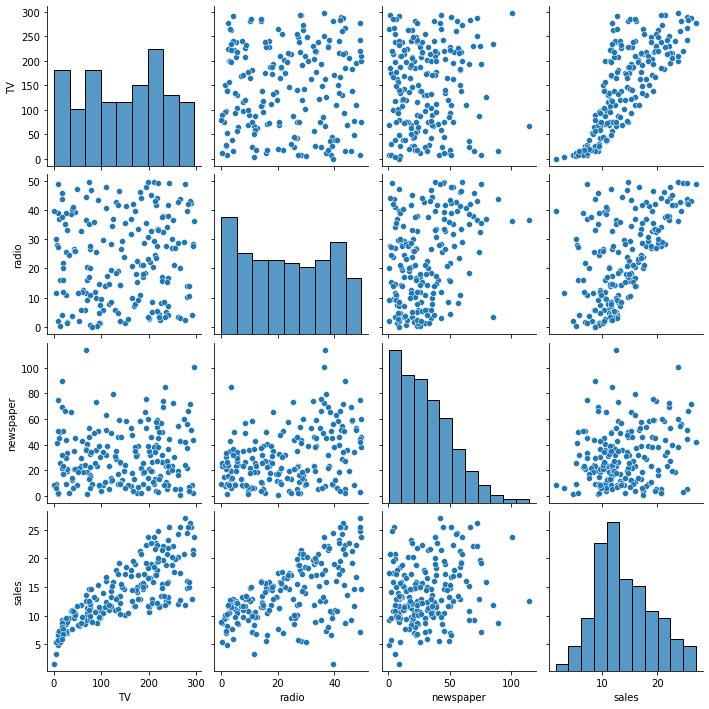

In [9]:
sns.pairplot(df);

In [10]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

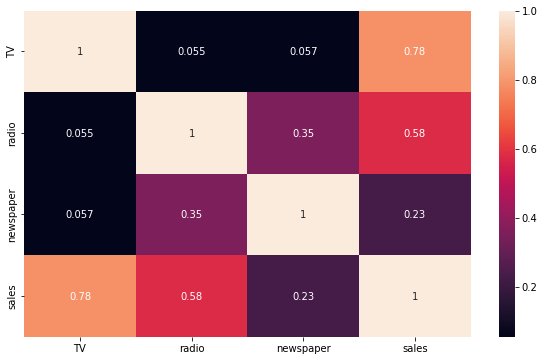

In [11]:
sns.heatmap(df.corr(), annot = True)

## Train-Test Split

In [12]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [13]:
X = df.drop(columns ="sales") #df[["TV", "radio", "newspaper"]]
y = df["sales"]

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42)

In [16]:
df.sample(15)

,TV,radio,newspaper,sales
57,136.2,19.2,16.6,13.2
123,123.1,34.6,12.4,15.2
61,261.3,42.7,54.7,24.2
141,193.7,35.4,75.6,19.2
78,5.4,29.9,9.4,5.3
75,16.9,43.7,89.4,8.7
170,50.0,11.6,18.4,8.4
199,232.1,8.6,8.7,13.4
36,266.9,43.8,5.0,25.4
9,199.8,2.6,21.2,10.6


In [18]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (160, 3)
Train target shape   :  (160,)
Test features shape  :  (40, 3)
Test target shape    :  (40,)


In [19]:
X_train

,TV,radio,newspaper
79,116.0,7.7,23.1
197,177.0,9.3,6.4
38,43.1,26.7,35.1
24,62.3,12.6,18.3
122,224.0,2.4,15.6
...,...,...,...
106,25.0,11.0,29.7
14,204.1,32.9,46.0
92,217.7,33.5,59.0
179,165.6,10.0,17.6


In [20]:
X_test

,TV,radio,newspaper
95,163.3,31.6,52.9
15,195.4,47.7,52.9
30,292.9,28.3,43.2
158,11.7,36.9,45.2
128,220.3,49.0,3.2
115,75.1,35.0,52.7
69,216.8,43.9,27.2
170,50.0,11.6,18.4
174,222.4,3.4,13.1
45,175.1,22.5,31.5


In [21]:
y_train

79     11.0
197    12.8
38     10.1
24      9.7
122    11.6
       ... 
106     7.2
14     19.0
92     19.4
179    12.6
102    14.8
Name: sales, Length: 160, dtype: float64

## Model Fitting and Compare Actual and Predicted Labels

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
model = LinearRegression()

In [24]:
model.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred = model.predict(X_test)
y_pred

array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326,
       13.10559172, 21.05719192,  7.46101034, 13.60634581, 15.15506967,
        9.04831992,  6.65328312, 14.34554487,  8.90349333,  9.68959028,
       12.16494386,  8.73628397, 16.26507258, 10.27759582, 18.83109103,
       19.56036653, 13.25103464, 12.33620695, 21.30695132,  7.82740305,
        5.80957448, 20.75753231, 11.98138077,  9.18349576,  8.5066991 ,
       12.46646769, 10.00337695, 21.3876709 , 12.24966368, 18.26661538,
       20.13766267, 14.05514005, 20.85411186, 11.0174441 ,  4.56899622])

In [26]:
model.coef_

array([0.04472952, 0.18919505, 0.00276111])

In [27]:
model.intercept_

2.979067338122629

In [27]:
# y_pred = b3 * TV + b2 * radio + b3 * newspaper + b0

In [28]:
X_test.loc[95]

TV           163.3
radio         31.6
newspaper     52.9
Name: 95, dtype: float64

In [29]:
model.coef_

array([0.04472952, 0.18919505, 0.00276111])

In [30]:
sum(X_test.loc[95] * model.coef_) + model.intercept_

16.408024203228628

In [31]:
my_dict = {"Actual": y_test, "Pred": y_pred, "Residual":y_test-y_pred}

In [32]:
comparing = pd.DataFrame(my_dict)
comparing

,Actual,Pred,Residual
95,16.9,16.408024,0.491976
15,22.4,20.889882,1.510118
30,21.4,21.553843,-0.153843
158,7.3,10.608503,-3.308503
128,24.7,22.112373,2.587627
115,12.6,13.105592,-0.505592
69,22.3,21.057192,1.242808
170,8.4,7.461010,0.938990
174,11.5,13.606346,-2.106346
45,14.9,15.155070,-0.255070


In [33]:
result_sample = comparing.head(25)
result_sample

,Actual,Pred,Residual
95,16.9,16.408024,0.491976
15,22.4,20.889882,1.510118
30,21.4,21.553843,-0.153843
158,7.3,10.608503,-3.308503
128,24.7,22.112373,2.587627
115,12.6,13.105592,-0.505592
69,22.3,21.057192,1.242808
170,8.4,7.461010,0.938990
174,11.5,13.606346,-2.106346
45,14.9,15.155070,-0.255070


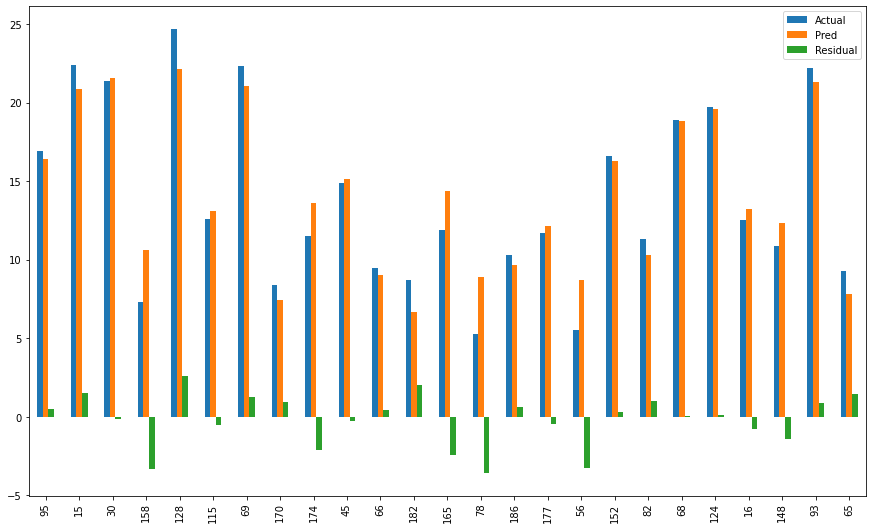

In [34]:
result_sample.plot(kind ="bar", figsize=(15,9))
plt.show()

## Error Metrics

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [36]:
R2_score = r2_score(y_test, y_pred)
R2_score

0.899438024100912

In [37]:
mae = mean_absolute_error(y_test, y_pred)
mae

1.4607567168117603

In [38]:
mse = mean_squared_error(y_test, y_pred)
mse

3.1740973539761033

In [39]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

1.78159966153345

In [40]:
sales_mean = df["sales"].mean()
sales_mean

14.0225

In [41]:
mae / sales_mean

0.10417234564533857

In [42]:
rmse / sales_mean

0.12705292647769298

## Adjusted R2 score 

https://towardsdatascience.com/demystifying-r-squared-and-adjusted-r-squared-52903c006a60

In [43]:
def adj_r2(y_test, y_pred, X):
    r2 = r2_score(y_test, y_pred)
    n = X.shape[0]   # number of observations  
    p = X.shape[1]-1 # number of independent variables  
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [44]:
X.shape, X.shape[1]

((200, 3), 3)

In [45]:
adj_r2(y_test, y_pred, X)

0.898417090335439

## What is the concept of punishment for RMSE error metric?

In [46]:
variables = {"Actual": [1000, 2000, 3000, 4000, 5000], "pred": [1100, 2200, 3200, 4200, 5300]}  # 6000

In [48]:
df_2 = pd.DataFrame(variables)
df_2

,Actual,pred
0,1000,1100
1,2000,2200
2,3000,3200
3,4000,4200
4,5000,5300


In [49]:
df_2["residual"] = abs(df_2.Actual - df_2.pred)

In [50]:
df_2

,Actual,pred,residual
0,1000,1100,100
1,2000,2200,200
2,3000,3200,200
3,4000,4200,200
4,5000,5300,300


In [51]:
#mae
df_2.residual.sum()/5 

200.0

In [52]:
#rmse
((df_2.residual**2).sum()/5)**0.5 

209.76176963403032

## Evaluation Model

In [53]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [54]:
eval_metric(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.899438024100912
MAE 		: 1.4607567168117603
MSE 		: 3.1740973539761033
RMSE 		: 1.78159966153345


In [55]:
y_train_pred = model.predict(X_train)

In [56]:
eval_metric(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8957008271017818
MAE 		: 1.1984678961500137
MSE 		: 2.705129423081414
RMSE 		: 1.644727765644337


## Is data suitable for linear regression?

https://stats.stackexchange.com/questions/12262/what-if-residuals-are-normally-distributed-but-y-is-not

## Plotting residuals

In [57]:
residuals = y_test-y_pred

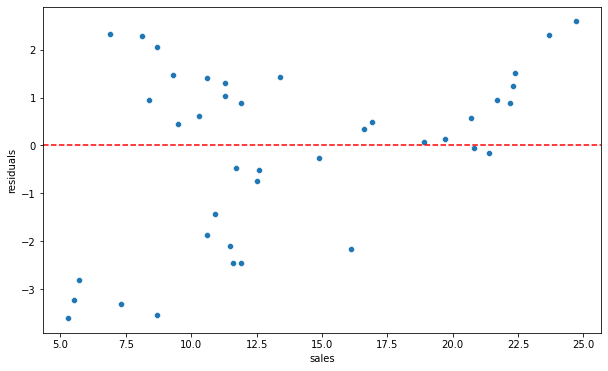

In [58]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = y_test, y = residuals) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.show()

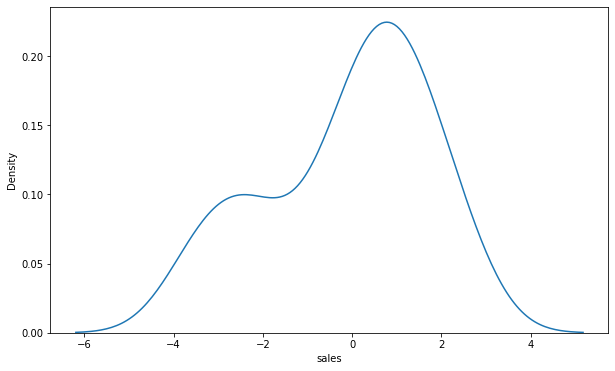

In [59]:
sns.kdeplot(residuals);

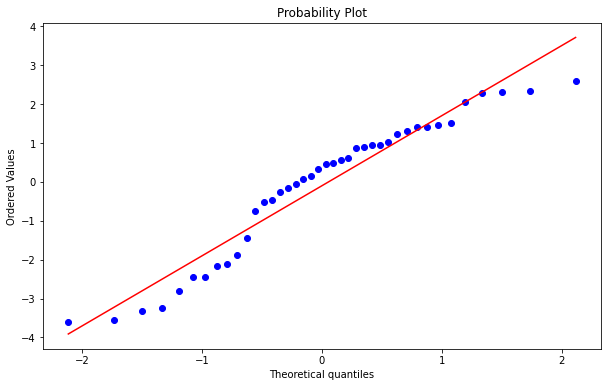

In [60]:
stats.probplot(residuals, dist ="norm", plot =plt);

In [63]:
from scipy.stats import skew
skew(residuals)

-0.5399061927739792

In [62]:
pip install yellowbrick

     -------------------------------------- 274.2/274.2 kB 1.3 MB/s eta 0:00:00


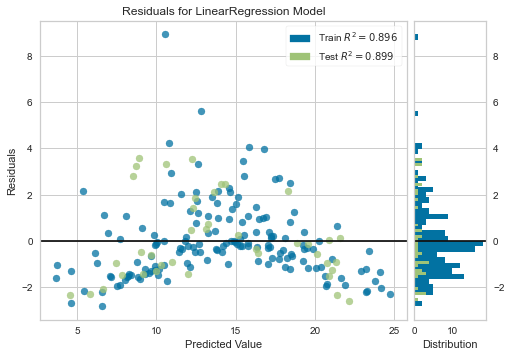

In [64]:
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();        # Finalize and render the figure

## Prediction Error for LinearRegression

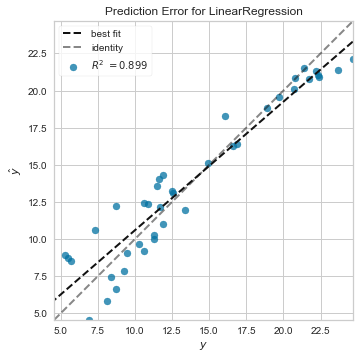

In [62]:
from yellowbrick.regressor import PredictionError
# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();    

## Retraining Model on Full Data

In [65]:
final_model = LinearRegression()

In [66]:
final_model.fit(X, y)

LinearRegression()

## Coefficients

In [67]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [68]:
final_model.intercept_

2.938889369459412

In [69]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [70]:
coeff_df = pd.DataFrame(final_model.coef_, index = X.columns, columns = ["Coefficient"] )

In [71]:
coeff_df

,Coefficient
TV,0.045765
radio,0.188530
newspaper,-0.001037


## Prediction on New Data

In [72]:
adv = [[150, 20, 15]] # 2D

In [73]:
adv

[[150, 20, 15]]

In [74]:
final_model.predict(adv)

array([13.55862413])

In [75]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [76]:
final_model.intercept_

2.938889369459412

In [77]:
sum(final_model.coef_ * [150, 20, 15]) + final_model.intercept_

13.558624130495996

In [78]:
adv_2 = [[150, 20, 15], [160, 20, 15]]

In [79]:
final_model.predict(adv_2)

array([13.55862413, 14.01627059])

In [80]:
14.01627059 - 13.55862413

0.4576464599999994